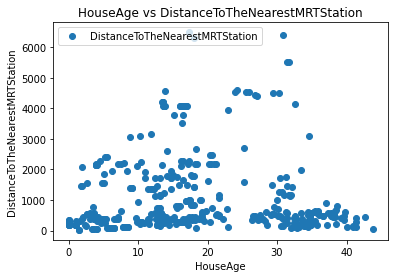

[1029.09790192]
[[4.44997966]]
Mean Absolute Error: 952.5055988048362
Mean Squared Error: 1640915.6753899395
Root Mean Squared Error: 1280.9823087732084


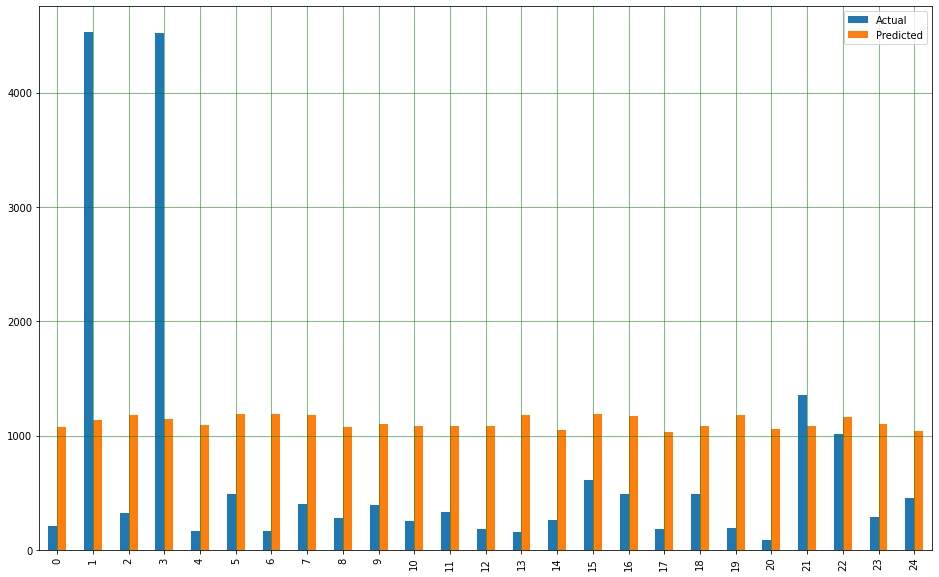

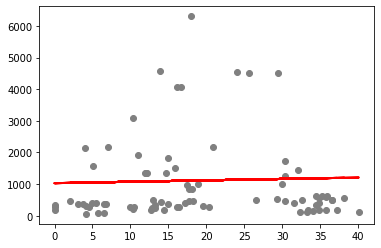

TypeError: list indices must be integers or slices, not list

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.linear_model import LinearRegression
# Import Input data
myfile = pd.ExcelFile("//Users/rathinakumarchandrasekaran/Documents/Realestatevaluationdataset.xlsx").parse("Sheet1")
# Assign individual column to variables
TransactionDate=[]
TransactionDate.append(myfile['TransactionDate'])

HouseAge=[]
HouseAge.append(myfile['HouseAge'])

DistanceToTheNearestMRTStation=[]
DistanceToTheNearestMRTStation.append(myfile['DistanceToTheNearestMRTStation'])

NumberOfConvenienceStores=[]
NumberOfConvenienceStores.append(myfile['NumberOfConvenienceStores'])

Latitude=[]
Latitude.append(myfile['Latitude'])

Longitude=[]
Longitude.append(myfile['Longitude'])

HousePriceOfUnitArea=[]
HousePriceOfUnitArea.append(myfile['HousePriceOfUnitArea'])

dataset=[]
dataset.append(myfile['HouseAge'])
dataset.append(myfile['DistanceToTheNearestMRTStation'])
dataset.append(myfile['NumberOfConvenienceStores'])
dataset.append(myfile['Latitude'])
dataset.append(myfile['Longitude'])
dataset.append(myfile['HousePriceOfUnitArea'])
# plotting
myfile.plot(x='HouseAge', y='DistanceToTheNearestMRTStation', style='o')
plt.title('HouseAge vs DistanceToTheNearestMRTStation')
plt.xlabel('HouseAge')
plt.ylabel('DistanceToTheNearestMRTStation')
plt.show()

# next step is to divide the data into “attributes” and “labels”.

X = HouseAge[0].values.reshape(-1,1)
y = DistanceToTheNearestMRTStation[0].values.reshape(-1,1)

#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
# The test_size variable is where we actually specify the proportion of the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# After splitting the data into training and testing sets, finally, the time is to train our algorithm.
# For that, we need to import LinearRegression class,

regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

# Now that we have trained our algorithm, it’s time to make some predictions.
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.
# To make predictions on the test data, execute the following script:

y_pred = regressor.predict(X_test)
# Now compare the actual output values for X_test with the predicted values,
# execute the following script:

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
# We can also visualize comparison result as a bar graph using the below script :
# Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


# Though our model is not very precise, the predicted percentages are close to the actual ones.
# Let's plot our straight line with the test data :

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# The straight line in the above graph shows our algorithm is correct.
# The final step is to evaluate the performance of the algorithm.
# This step is particularly important to compare
# how well different algorithms perform on a particular dataset
# . For regression algorithms, three evaluation metrics are commonly used:

# Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))




